Internet Resources:

[Python Programming.net - machine learning episodes 13-19](https://pythonprogramming.net/k-nearest-neighbors-intro-machine-learning-tutorial/)

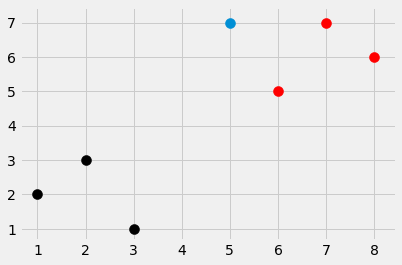

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
import pandas as pd
import random

style.use('fivethirtyeight')

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()

result: r confidence:  3


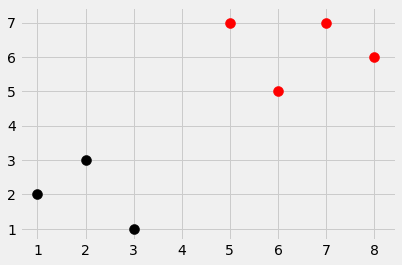

In [3]:
def knn(data, predict, k=3): #k nearest neighbors
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')

    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            distances.append([euclidean_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0] # only the first most common
    confidence = Counter(votes).most_common(1)[0][1]
    
    return vote_result, confidence

result, conf = knn(dataset, new_features, 3)
print("result:", result, "confidence: ", conf)
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

In [5]:
df = pd.read_csv('data/breast-cancer-wisconsin.data') # data from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)
test_size = 0.2 # =20%
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for sample in train_data:
    train_set[sample[-1]].append(sample[:-1])  # for dict[sample[:-1]] append everything up to sample[-1]

for sample in test_data:
    test_set[sample[-1]].append(sample[:-1])
    
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = knn(train_set, data, k=5)
        if group == vote:
            correct += 1
        else: 
            print("wrong classification, sample: ", sample, "confidence: ", confidence)
        total += 1
print('Accuracy:', correct/total)

wrong classification, sample:  [1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0] confidence:  3
wrong classification, sample:  [1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0] confidence:  3
wrong classification, sample:  [1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0] confidence:  5
wrong classification, sample:  [1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0] confidence:  5
wrong classification, sample:  [1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0] confidence:  5
wrong classification, sample:  [1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0] confidence:  4
wrong classification, sample:  [1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0] confidence:  3
wrong classification, sample:  [1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0] confidence:  5
wrong classification, sample:  [1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0] confidence:  5
Accuracy: 0.935251798561151
